# Biometric Prediction on Keystroke Dynamics

This project takes a look at a biometric classifier with keystroke dynamics. Besides typing a password to validate a user, it is possible to discriminate users by their typing rhythms. This features can be used to detect impostors. This project is based on the data set of the publication _Killourhy, K. S., & Maxion, R. A. [Comparing anomaly detectors for keystroke dynamics.](http://www.cs.cmu.edu/%7Emaxion/pubs/KillourhyMaxion09.pdf) In Proc. of the Int. Conf. on Dependable Systems and Networks (DSN) (pp. 125-134)_. The objective is to build a classification baser on neural networks with the [keras](https://keras.io/) library.

The [data set](https://www.cs.cmu.edu/~keystroke/) consists of 51 subject each typing the password `.tie5Roanl` 400 times. The measures collected are the hold time (H), keydown-keydown time (DD) and keyup-keydown time (UD).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec 

from minisom import MiniSom
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('data/test_data.csv')
subject = df['subject']
df.head()

,subject,H.period,DD.period.k,UD.period.k,H.k,DD.k.three,UD.k.three,H.three,DD.three.m,UD.three.m,...,UD.a.b,H.b,DD.b.z,UD.b.z,H.z,DD.z.Enter,UD.z.Enter,H.Enter,DD.Enter.,UD.Enter.
0,1,148,112,78,78,0,45,46,1,71,...,105,105,0,62,62,0,40,40,0,69
1,1,167,98,65,66,1,100,100,0,40,...,34,34,0,50,50,0,94,95,1,85
2,1,186,101,55,56,1,73,73,0,56,...,74,75,1,53,55,2,47,48,1,65
3,1,167,102,90,90,0,40,40,0,88,...,38,38,0,88,88,0,95,98,3,58
4,1,157,99,94,95,1,62,62,0,101,...,63,63,0,52,52,0,93,94,1,79


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

#df_data = df.drop(columns=['subject', 'sessionIndex', 'rep'])
df_data = df.drop(columns=['subject'])
X = df_data.iloc[:, :].values 
y = df["subject"].loc[:].values 

# X_1 = df_data.iloc[0:100, :]
# X_2 = df_data.iloc[400:500, :]
# X_frames = [X_1, X_2]
# X = pd.concat(X_frames).values

# y_1 = df["subject"].loc[0:99]
# y_2 = df["subject"].loc[400:499]
# y_frames = [y_1, y_2]
# y = pd.concat(y_frames).values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=42,
                                                    stratify=df["subject"].values)
sc = Normalizer()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

X_train_scaled, y_train, X.shape, y.size

(array([[0.10905365, 0.31693717, 0.20788352, ..., 0.12268536, 0.37316796,
         0.2504826 ],
        [0.36261439, 0.26302312, 0.12257388, ..., 0.23493327, 0.00510724,
         0.15832459],
        [0.34682589, 0.25021011, 0.21800485, ..., 0.09909311, 0.        ,
         0.14120769],
        ...,
        [0.38198202, 0.25629761, 0.16757921, ..., 0.24644001, 0.0024644 ,
         0.22426041],
        [0.53236668, 0.28264829, 0.11251048, ..., 0.27167166, 0.00274416,
         0.20855602],
        [0.1476668 , 0.32889425, 0.18122744, ..., 0.10907207, 0.30875786,
         0.19968579]]),
 array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1

iteration=9999 status=99.99% error=0.13042918471699239

Text(0.5,0,'iteration index')

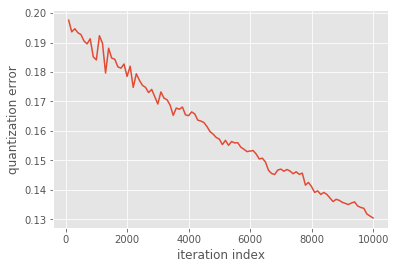

In [4]:
# Training the Data 
import sys

grid_x = 8
grid_y = 8
sigma = 1
neighborhood_function='gaussian'

som = MiniSom(grid_x, grid_y, 33, sigma, learning_rate=0.5, 
              neighborhood_function=neighborhood_function, random_seed=10)
som.pca_weights_init(X_train_scaled)
max_iter = 10001
q_error_pca_init = []
iter_x = []

for i in range(max_iter):
    percent = 100*(i+1)/max_iter
    rand_i = np.random.randint(len(X_train_scaled))
    som.update(X_train_scaled[rand_i], som.winner(X_train_scaled[rand_i]), i, max_iter)
    if (i+1) % 100 == 0:
        error = som.quantization_error(X_train_scaled)
        q_error_pca_init.append(error)
        iter_x.append(i)
        sys.stdout.write(f'\riteration={i:2d} status={percent:0.2f}% error={error}')
        
plt.plot(iter_x, q_error_pca_init)
plt.ylabel('quantization error')
plt.xlabel('iteration index')

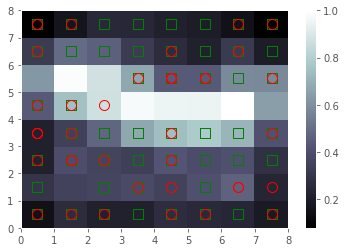

Quantization error 0.13055076054477427


In [5]:
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()

# Subject 2 is a red circle, Subjecr 3 is a green circle
markers = ['o', 's', '*']
colors = ['r', 'g', 'b']
for i, x in enumerate(X_train_scaled):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5, 
         markers[y[i]-3],
         markeredgecolor = colors[y[i]-3], 
         markerfacecolor = 'None', 
         markersize = 10, 
         markeredgewidth = 1)
plt.savefig("clustering_{}_{}_{}.png".format(grid_x, sigma, 
                                             neighborhood_function))
show()
error = som.quantization_error(X_train_scaled)
print("Quantization error {}".format(error))

In [17]:
import random

def predict_user(data): 
    winner = som.winner(data)
    labels_map = som.labels_map(X, y)
    label_names = np.unique(y)
    if(type(labels_map[winner]) != list):
        label_pred = labels_map[winner].most_common(1)[0][0]
    else:
        label_pred = random.randint(0,1);
        print(label_pred)
    return label_pred
 

In [26]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

y_pred = []
total_accuracy = 0
total_F1 = 0
total_auc = 0

for i in range(X_test_scaled.shape[0]):
    test = X_test_scaled[i,:]
    label_pred = predict_user(test)
    y_pred.append(label_pred)
#     win = som.winner(test)
#     labels_map = som.labels_map(X, y)
#     label_names = np.unique(y)
#     print(labels_map[win])
#     if(type(labels_map[win]) != list):
#         label_pred = labels_map[win].most_common(1)[0][0]
#         y_pred.append(label_pred)
#     else:
#         if(y_test[i] == 0):
#             y_pred.append(1)
#         else:
#             y_pred.append(0)
            
y_pred = np.asarray(y_pred)

0
0
1


In [27]:
# y_test = np.subtract(y_test,2)
# y_pred = np.subtract(y_pred,2)

# y_test = np.add(y_test,1)
# y_pred = np.add(y_pred,1)

print("% Accuracy: ", accuracy_score(y_test[:], y_pred))
print("F1 score: ", f1_score(y_test[:], y_pred)) 
print("AUC score: ", roc_auc_score(y_test[:], y_pred))
y_test, y_pred

% Accuracy:  0.9444444444444444
F1 score:  0.9500000000000001
AUC score:  0.94375


(array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64),
 array([0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64))

In [31]:
import pickle 

with open('som_8_8_1_gaussian.p', 'wb') as outfile:
    pickle.dump(som, outfile)

## Activations Frequencies 

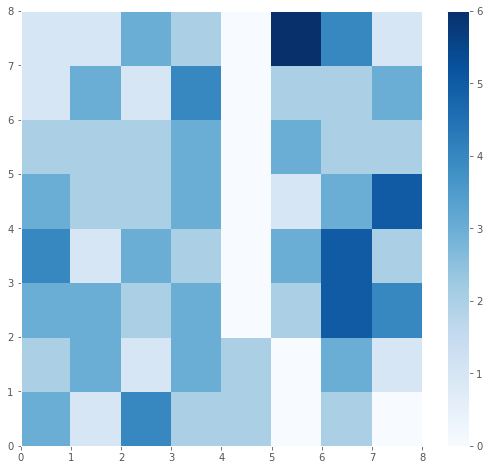

In [32]:
plt.figure(figsize=(grid_x+1, grid_y))
frequencies = np.zeros((grid_x, grid_y))
for position, values in som.win_map(X_train_scaled).items():
    frequencies[position[0], position[1]] = len(values)
plt.pcolor(frequencies, cmap='Blues')
plt.colorbar()
plt.show()

## Class Pies 

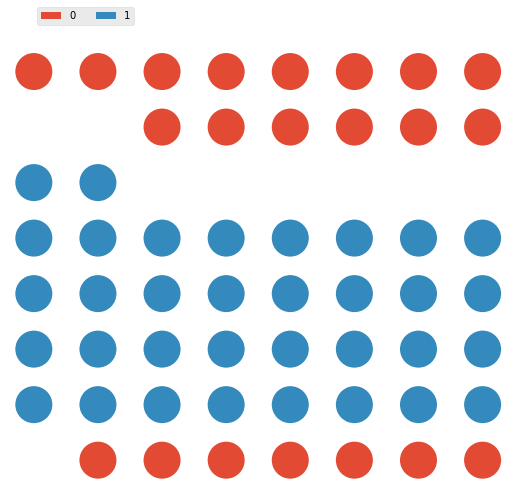

In [33]:
labels_map = som.labels_map(X_train_scaled, y_train)
label_names = np.unique(y)
                        
plt.figure(figsize=(grid_x+1, grid_y))
the_grid = GridSpec(grid_x, grid_y)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[6-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 8), ncol=3)
plt.savefig('som_keystroke_pies.png')
plt.show()